## Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, we develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.



## 1. Import Libraries

In [1]:
# Handle Warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)



## 2. Reading and Inspection


In [3]:
# Read data from file 'application_data.csv' 
df_new_app= pd.read_csv("application_data.csv")

# Use head() function to check top rows of dataframe
df_new_app.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Determining the number of rows and columns
df_new_app.shape

(307511, 122)

In [5]:
# Summary of all the numeric columns in the dataset
df_new_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# Datatypes of each column
df_new_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## 3.Check missing values

In [7]:
#Column-wise null count 
df_new_app.isnull().sum()


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
#Percentage of missing values for all columns 
null_count=round(100*(df_new_app.isnull().mean()),2).sort_values(ascending=False)
null_count


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [9]:
#Columns with high missing percentage >=40%
null_count=null_count[null_count>=40]
null_count

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
len(null_count)

49

##### Here, we can observe that 49 columns have missing data in excess of 40% in them. So let's take away those columns here.

## 4.Impute/Remove missing values

In [11]:
# Removing the 49 columns with more than 40% of their values missing
cols_dropped=([null_count[null_count >=40.00].index])
df_new_app.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [12]:
# After deleting columns with a high percentage of missing values, the columns
df_new_app.shape

(307511, 73)

In [13]:
# After deleting high missing values (>=40 percent), check the columns.
100*(df_new_app.isnull().mean().sort_values(ascending=False))

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

##### Observations: 
- Keep in mind that some columns have roughly 31%, 19%, 13%, etc. of their values missing. When dealing with columns, you have two simple choices - either delete or retain the column. If you keep the column, you'll need to impute the rows with missing values.

- Data is lost if the missing rows are deleted. There's a danger that if you impute, you'll introduce some bias later.

##### Let's remove the columns which are not necessary for our analysis.

In [14]:
# Use head() function to check top rows of dataframe
df_new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


##### Drop unnecessary columns from the dataset like:
- Documentation Flag Column which is not very much important for analysis
- Family member count Column etc.

In [15]:
# Drop unnecessary columns from the dataset like:Documentation Column,Flag Columns etc.
Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3']

df_new_app.drop(labels=Drop_col,axis=1,inplace=True)

In [16]:
# Checking the number of columns after dropping unncessary columns
df_new_app.shape

(307511, 42)

In [17]:
# Check the remaining columns left with missing values
(df_new_app.isnull().mean() * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
AMT_INCOME_TOTAL                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
CNT_CHILDREN                    0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TY

#### AMT_ANNUITY Variable

In [18]:
# Missing values count in "AMT_ANNUITY" column
df_new_app.AMT_ANNUITY.isnull().sum()

12

In [19]:
# Check Percentage of missing values in "AMT_ANNUITY" column
(df_new_app.AMT_ANNUITY.isnull().mean())*100

0.003902299429939092

In [20]:
# Get Statistical analysis of the "AMT_ANNUITY" column
df_new_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

##### Observation :
We can observe that the "AMT ANNUITY" column, which contains numerical data, has a very low percentage of null values.
We can impute missing values using the median because this column also contains an outlier, as indicated above by the difference between the maximum value and 75% of the variance.

#### AMT_GOODS_PRICE variable

In [21]:
# Missing values count in "AMT_GOODS_PRICE" column
df_new_app.AMT_GOODS_PRICE.isnull().sum()

278

In [22]:
# Percentage of missing values in "AMT_GOODS_PRICE" column
(df_new_app.AMT_GOODS_PRICE.isnull().mean())*100

0.09040327012692229

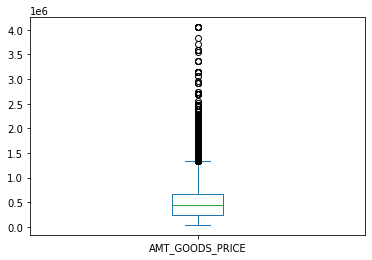

In [23]:
# Get Statistical analysis of the "AMT_GOODS_PRICE" column
df_new_app.AMT_GOODS_PRICE.plot.box()
plt.show()

In [24]:
df_new_app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [25]:
df_new_app.AMT_GOODS_PRICE.median()

450000.0

In [26]:
df_new_app.AMT_GOODS_PRICE.mode()

0    450000.0
dtype: float64

##### Observation :
Only a smaller fraction of values are missing in AMT GOODS PRICE. Additionally, outliers are shown using a box plot, but the values of the outliers are evenly scattered across the graph. Since the median and mode values of the following data were found to be identical, we can substitute any missing values with either the median or the mode.

#### EXT_SOURCE_2 variable

In [27]:
df_new_app.EXT_SOURCE_2.isnull().sum()

660

In [28]:
(df_new_app.EXT_SOURCE_2.isnull().mean())*100

0.21462646864665005

The percentage of missing values is lower in the EXT SOURCE 2 column. Here, we can substitute 0 for the missing numbers.

#### NAME_TYPE_SUITE Variable

In [29]:
# Use the dtype function to check the categorical column "NAME TYPE SUITE"
df_new_app.NAME_TYPE_SUITE.dtype

dtype('O')

In [30]:
# Check count of missing values in "NAME_TYPE_SUITE" column
df_new_app.NAME_TYPE_SUITE.isnull().sum()

1292

In [31]:
# Percentage of missing values in "NAME_TYPE_SUITE" column
100*(df_new_app.NAME_TYPE_SUITE.isnull().mean())

0.42014757195677555

In [32]:
# print the percentage of each NAME_TYPE_SUITE in the data frame.
df_new_app.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [33]:
# find the mode of NAME_TYPE_SUITE in dataframe
name_mode=df_new_app.NAME_TYPE_SUITE.mode()[0]
name_mode

'Unaccompanied'

As a result, the category variable "NAME TYPE SUITE" in this instance has around 0.42 percent of its values missing. Since "Unaccompanied" is the most prevalent category, we can substitute the missing data here.

#### OCCUPATION_TYPE variable

In [34]:
# Check count of missing values in "OCCUPATION_TYPE" column
df_new_app.OCCUPATION_TYPE.isnull().sum()

96391

In [35]:
# Percentage of missing values in "OCCUPATION_TYPE" column
100*(df_new_app.OCCUPATION_TYPE.isnull().mean())

31.345545362604916

In [36]:
# Print the percentage of each OCCUPATION_TYPE in the data frame. 
df_new_app.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

Here, the categorical variable "OCCUPATION TYPE" likewise has roughly 31.3 percent of its values missing. For safety's sake, we shall impute missing values with "Unknown," which will prevent data loss and have no effect on subsequent analysis.

In [37]:
(df_new_app.isnull().mean() * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
AMT_INCOME_TOTAL                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
CNT_CHILDREN                    0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TY

In [38]:
# Drop below columns which is of now use for analysis purpose
# AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,
# DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
Drop_col = ["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_YEAR",
"DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]
df_new_app.drop(labels=Drop_col,axis=1,inplace=True)

In [39]:
# Check again the percentage of the missing value and dropped column
(df_new_app.isnull().mean() * 100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
DAYS_ID_PUBLISH                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_EMPLOYED                   0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
DAYS_REGISTRATION               0.000000
SK_ID_CURR                      0.000000
DAYS_BIRTH                      0.000000
TARGET                          0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_CREDIT      

## 5. Standardizing Value

In [40]:
# Use Head Mehtod to rectrive top 5 rows from dataframe
df_new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738


In [41]:
# Converting from negative to positive DAYS_BIRTH.
df_new_app['DAYS_BIRTH']=abs(df_new_app['DAYS_BIRTH'])
df_new_app['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [42]:
# Converting from nagtive to positive DAYS_EMPLOYED
df_new_app['DAYS_EMPLOYED']=abs(df_new_app['DAYS_EMPLOYED'])
df_new_app['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [43]:
# Converting from nagtive to positve DAYS_REGISTRATION.
df_new_app['DAYS_REGISTRATION']=abs(df_new_app['DAYS_REGISTRATION'])
df_new_app['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [44]:
# Converting from nagtive to positve DAYS_ID_PUBLISH
df_new_app['DAYS_ID_PUBLISH']=abs(df_new_app['DAYS_ID_PUBLISH'])
df_new_app['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [45]:
# Converting the data type of Categorical column
df_new_app['REG_REGION_NOT_LIVE_REGION'] = df_new_app['REG_REGION_NOT_LIVE_REGION'].astype(object)
df_new_app['REG_REGION_NOT_WORK_REGION'] = df_new_app['REG_REGION_NOT_WORK_REGION'].astype(object)
df_new_app['LIVE_REGION_NOT_WORK_REGION'] = df_new_app['LIVE_REGION_NOT_WORK_REGION'].astype(object)
df_new_app['REG_CITY_NOT_LIVE_CITY'] = df_new_app['REG_CITY_NOT_LIVE_CITY'].astype(object)
df_new_app['REG_CITY_NOT_WORK_CITY'] = df_new_app['REG_CITY_NOT_WORK_CITY'].astype(object)
df_new_app['LIVE_CITY_NOT_WORK_CITY']=df_new_app['LIVE_CITY_NOT_WORK_CITY'].astype(object)

In [46]:
df_new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738


## 6.Handling Outliers

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### AMT_ANNUITY variable

In [47]:
#describe the AMT_ANNUITY variable of df
df_new_app.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

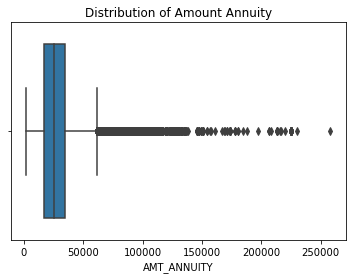

In [48]:
# Build box plot to check outliers in AMT_ANNUITY
sns.boxplot(df_new_app.AMT_ANNUITY)
plt.title('Distribution of Amount Annuity')
plt.show()

In [49]:
# Let's check the rows having outliers
df_new_app[df_new_app.AMT_ANNUITY > 250000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,15176,201,1529.0,4722,Managers,THURSDAY,14,1,1,0,1,1,1,Industry: type 4,0.706927


There are outliers at 258025, as we can see when we look at the AMT ANNUITY column. However, there isn't much of a difference between the median and mean, so we can use this to infer the outliers.



#### AMT_INCOME variable

In [50]:
df_new_app.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

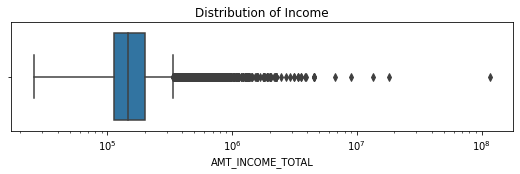

In [51]:
plt.figure(figsize=(9,2))
sns.boxplot(df_new_app.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [52]:
df_new_app.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

We can see that there are outlier numbers at 1.17x108 in the "AMT INCOME TOTAL" column. Occasionally, it is advantageous to examine the quantiles rather than the box plot, mean, or median. You might get a good notion about the outliers from the quantile. There are outliers in the data set if there is a significant divergence between the maximum value and the 95th or 99th quantiles.

There will undoubtedly be individual differences in total income. Here, we can limit the outliers.

#### AMT_CREDIT variable

In [53]:
df_new_app.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

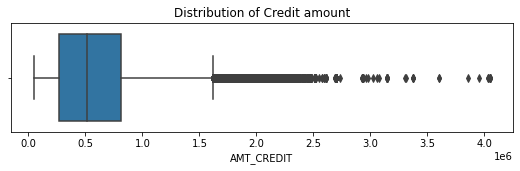

In [54]:
plt.figure(figsize=(9,2))
sns.boxplot(df_new_app.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [55]:
df_new_app.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

The outliers following the 99th quantile at 4.05x106 are visible in the AMT CREDIT column. The amount credited also differs from one person to the next.

#### DAYS_BIRTH variable

In [56]:
df_new_app.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

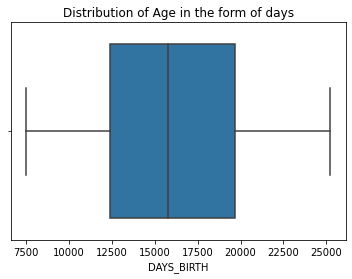

In [57]:
sns.boxplot(df_new_app.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

We can observe from the box plot that there are no outliers in the DAYS BIRTH column. Between mean and median, there is not much of a difference. which indicates that all of the customer applications are roughly the same age.

#### DAYS_EMPLOYED variable

In [58]:
df_new_app.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

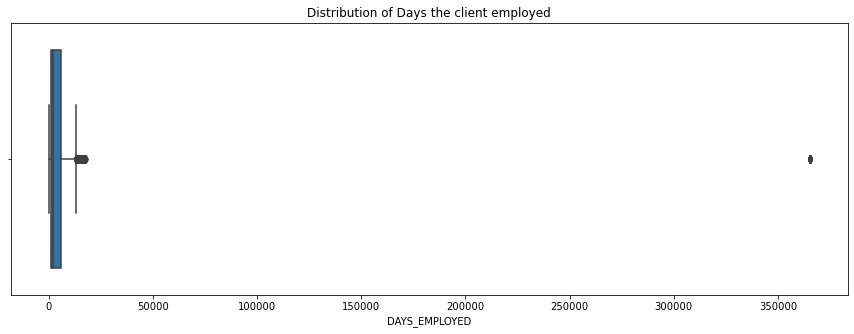

In [59]:
plt.figure(figsize=(15,5))
sns.boxplot(df_new_app.DAYS_EMPLOYED)
plt.title('Distribution of Days the client employed')
plt.show()

In [60]:
# Check mode of the DAYS_EMPLOYED column
df_new_app.DAYS_EMPLOYED.mode()

0    365243
dtype: int64

In [61]:
# We can see most of the values in column is filled with 365243,Let's convert this value into years
round(365243/365)

1001

In [62]:
# Check number of rows having value greater then 1000
len(df_new_app[df_new_app.DAYS_EMPLOYED >= 1000])

225375

In [63]:
# Check number of total rows in the dataset
df_new_app.shape

(307511, 32)

Outliers in the DAYS EMPLOYED column are at 365243. The important point to note in this situation is that the outlier figure is more than 1000 when we convert days to years.
It is impossible for someone to work for a company for more than 1000 years.
225375 rows in the DAYS EMPLOYED column out of 307511 records contain outliers, which significantly reduce the analyses' accuracy.

## 7. Binning Continuous Variable

#### AMT_INCOME_TOTAL variable

In [64]:
# Bins for Credit amount
bins = [0,350000,700000,1000000000]
labels = ['Low','Medium','High']

df_new_app['AMT_CREDIT_RANGE']=pd.cut(df_new_app['AMT_CREDIT'],bins=bins,labels=labels)

In [65]:
# Bins for income amount

bins = [0,200000,400000,10000000000]
labels = ['Low','Medium','High']

df_new_app['AMT_INCOME_RANGE']=pd.cut(df_new_app['AMT_INCOME_TOTAL'],bins=bins,labels=labels)

In [66]:
# Bins for days_birth

bins = [0,7300,10950,14600,18250,21900,25500]
labels = ['0-20','20-30','30-40','40-50','50-60','60-70']

df_new_app['AGE_RANGE']=pd.cut(df_new_app['DAYS_BIRTH'],bins=bins,labels=labels)

In [67]:
# Check for new column added to dataframe
df_new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60


## 8.Analysis

### Checking the imbalance Percentage

In [68]:
# Calculating Imbalance percentage
df_new_app.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Therefore, the TARGET column has 8.07% of 1s, meaning that 8% of clients are having payment issues and 91.92% are not.
- Split Dataset into two parts:
- target=1(client with payment difficulties)
- target=0(all other)

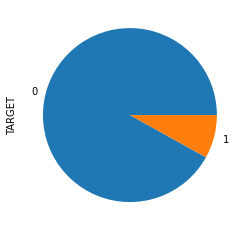

In [69]:
df_new_app.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

In [70]:
# Dividing the dataset into two dataset 
client_with_1 = df_new_app[df_new_app['TARGET']==1]
client_with_0 = df_new_app[df_new_app['TARGET']==0]

In [71]:
# Dataframe having target values 0
client_with_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,Medium,Low,40-50


In [72]:
# Dataframe having target values 1
client_with_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,High,Low,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,High,Medium,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,Low,Low,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,NaN,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,Low,Low,60-70


### 8. Segmented Univariate Analysis 

### Numeric variable

#### Age

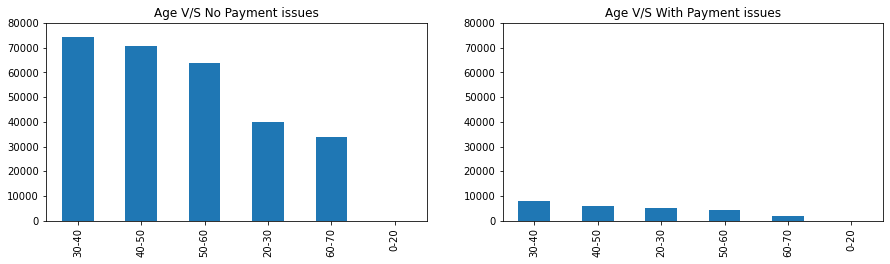

In [73]:
# Making Bar Graph of Age
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,80000)
plt.title('Age V/S No Payment issues')
client_with_0.AGE_RANGE.value_counts().plot.bar()
plt.subplot(2, 2, 2)
plt.ylim(0,80000)
plt.title('Age V/S With Payment issues')
client_with_1.AGE_RANGE.value_counts().plot.bar()
plt.show()

###### We can observe that customers belonging to age group 30-40 are able to make payment on time and can be considered while lending loan! but on the other chart we can visualize  that 30-40 age group customers are the one who has defaulted on Lone,Customer of Age group 60-70 are less likely to default on loans 

#### Amount credit range

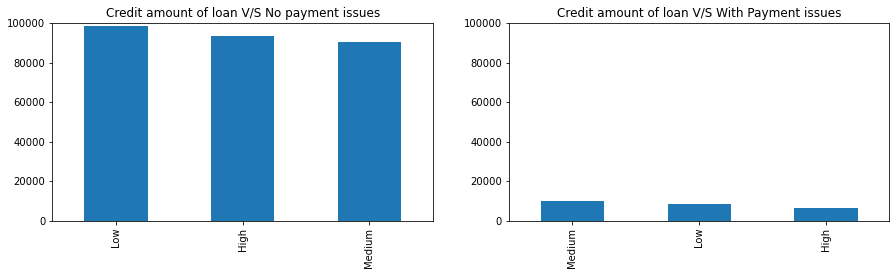

In [74]:
# Making Bar Graph of Amount Credit Range
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan V/S No payment issues')
client_with_0.AMT_CREDIT_RANGE.value_counts().plot.bar()
plt.subplot(2, 2, 2)
plt.ylim(0,100000)
plt.title('Credit amount of loan V/S With Payment issues')
client_with_1.AMT_CREDIT_RANGE.value_counts().plot.bar()
plt.show()

###### Customers with medium credit amounts are more likely to miss payments on lone payments, whereas customers with high credit amounts may be considered for leading lone payments.

### Categorical Variable

#### Occupation_type

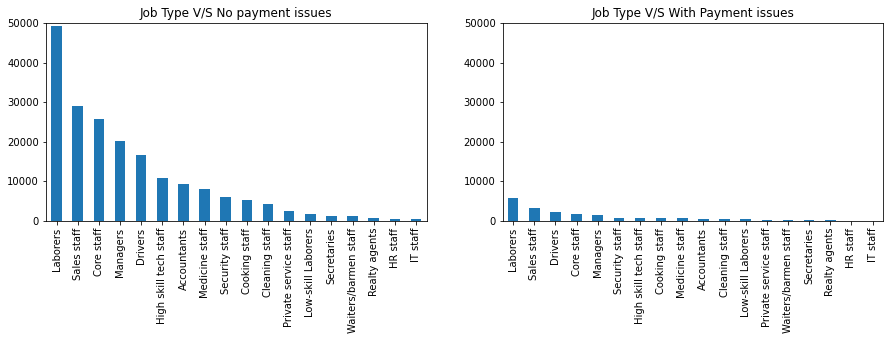

In [75]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.title('Job Type V/S No payment issues')
client_with_0.OCCUPATION_TYPE.value_counts().plot.bar()
plt.subplot(2, 2, 2)
plt.ylim(0,50000)
plt.xticks(rotation = 90)
plt.title('Job Type V/S With Payment issues')
client_with_1.OCCUPATION_TYPE.value_counts().plot.bar()
plt.show()

##### The plot unmistakably demonstrates that Laborers are more likely than IT Staff to pay their installments on time.

### Analyze continuous column with respect to the target column

#### Credit Amount

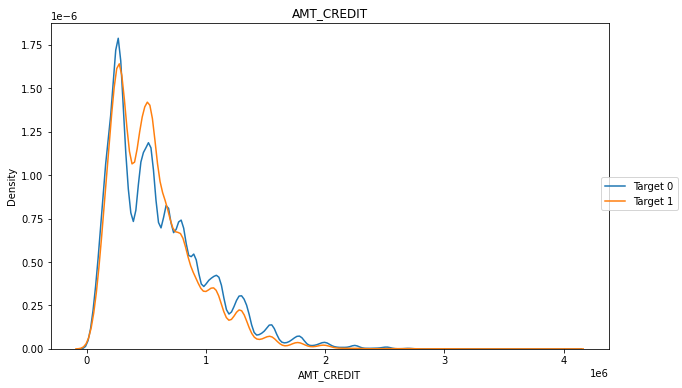

In [76]:
# Analyze the target column in relation to the continuous column.
fig = plt.figure(figsize=(10,6))
sns.distplot(client_with_0.AMT_CREDIT,hist=False)# Target = 0
sns.distplot(client_with_1.AMT_CREDIT,hist=False)# Taget = 1
fig.legend(labels=['Target 0','Target 1'],loc='right')
plt.title('AMT_CREDIT')
plt.show()

#### Amount Annuity

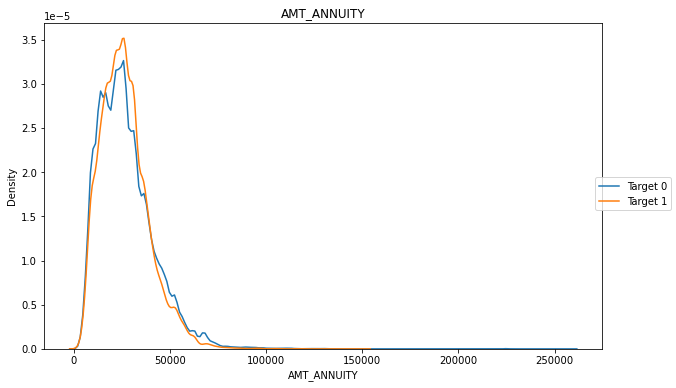

In [77]:
# Analyze the target column in relation to the continuous column.
fig = plt.figure(figsize=[10,6])
sns.distplot(client_with_0.AMT_ANNUITY, hist = False)# Target = 0
sns.distplot(client_with_1.AMT_ANNUITY, hist = False)# Taget = 1
plt.title('AMT_ANNUITY')
fig.legend(labels=["Target 0","Target 1"],loc='right')
plt.show()

#### Goods price

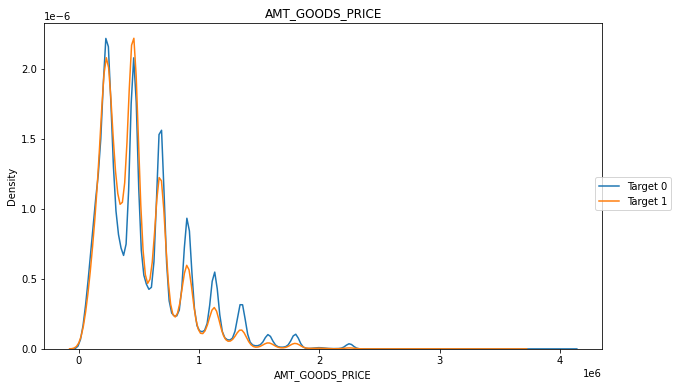

In [78]:
# Analyze the target column in relation to the continuous column.
fig = plt.figure(figsize=[10,6])
sns.distplot(client_with_0.AMT_GOODS_PRICE, hist = False)# Target = 0
sns.distplot(client_with_1.AMT_GOODS_PRICE, hist = False)# Taget = 1
plt.title('AMT_GOODS_PRICE')
fig.legend(labels=["Target 0","Target 1"],loc='right')
plt.show()

#### Education

In [79]:
# calculate the percentage of each education category of Target = 0.
client_with_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

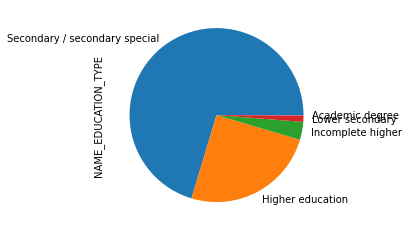

In [80]:
# Plot Pie chart for the NAME_EDUCATION_TYPE of dataframe where Target =0 
client_with_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

In [81]:
# calculate the percentage of each education category of Target = 1.
client_with_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)


Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

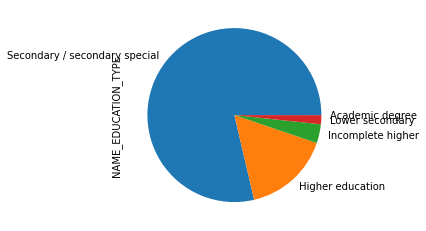

In [82]:
# Plot Pie chart for the NAME_EDUCATION_TYPE of dataframe where Target = 1 
client_with_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

###  Bivariate Analysis
##### Numeric-Numeric Analysis

There are three ways to analyse the numeric- numeric data types simultaneously.
- Scatter plot: describes the pattern that how one variable is varying with other variable.
- Correlation matrix: to describe the linearity of two numeric variables.
- Pair plot: group of scatter plots of all numeric variables in the data frame

### Income vs Credit, Goods price vs Credit

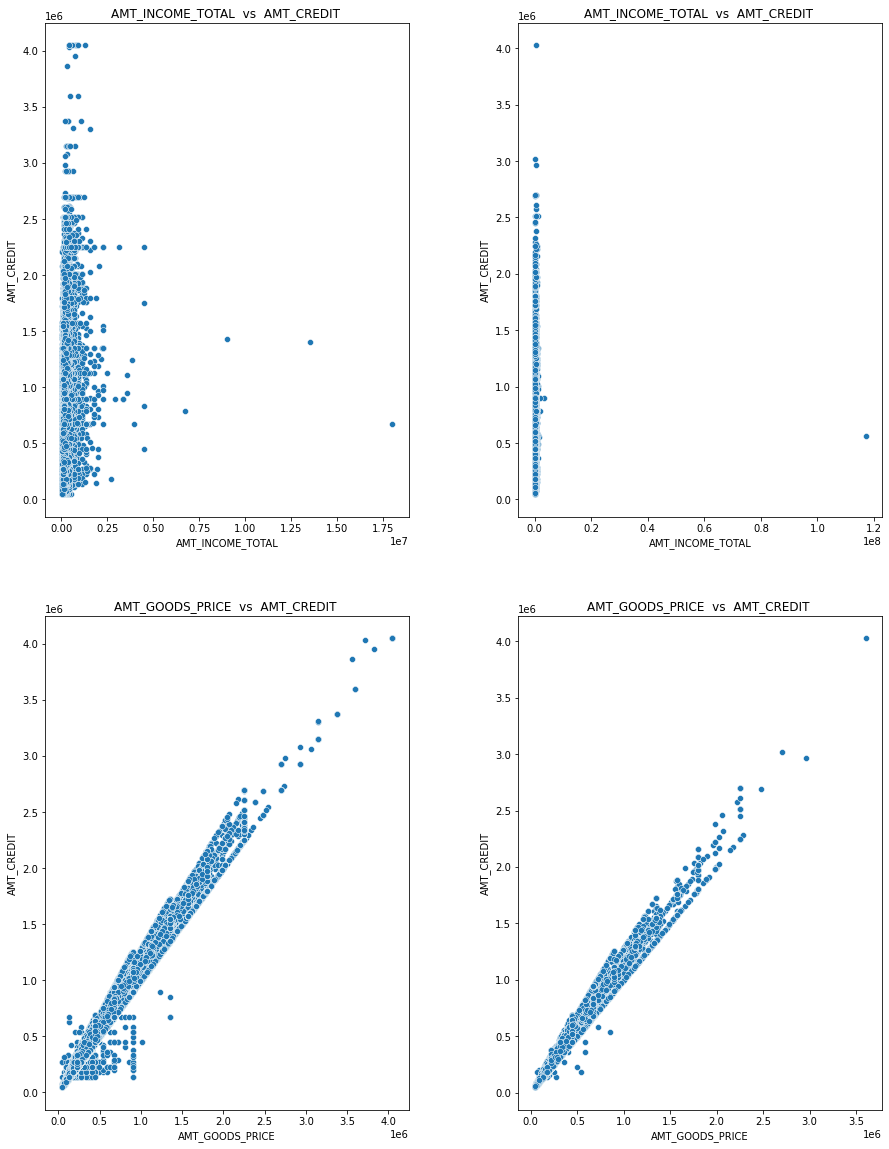

In [83]:
# Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(client_with_0.AMT_INCOME_TOTAL,client_with_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(client_with_1.AMT_INCOME_TOTAL,client_with_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(client_with_0.AMT_GOODS_PRICE,client_with_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')

plt.subplot(2,2,4)
sns.scatterplot(client_with_1.AMT_GOODS_PRICE,client_with_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.show()



###### In comparison to those who didn't pay or made late payments, individuals who had the loan amount paid on time or in whole were more likely to receive higher credits. In comparison to individuals with higher products prices but unpaid loans, those with higher goods prices and on-time payments have higher credit ratings.

### Numerical categorical analysis

### Income range- Gender

#### Credit amount vs Education Status

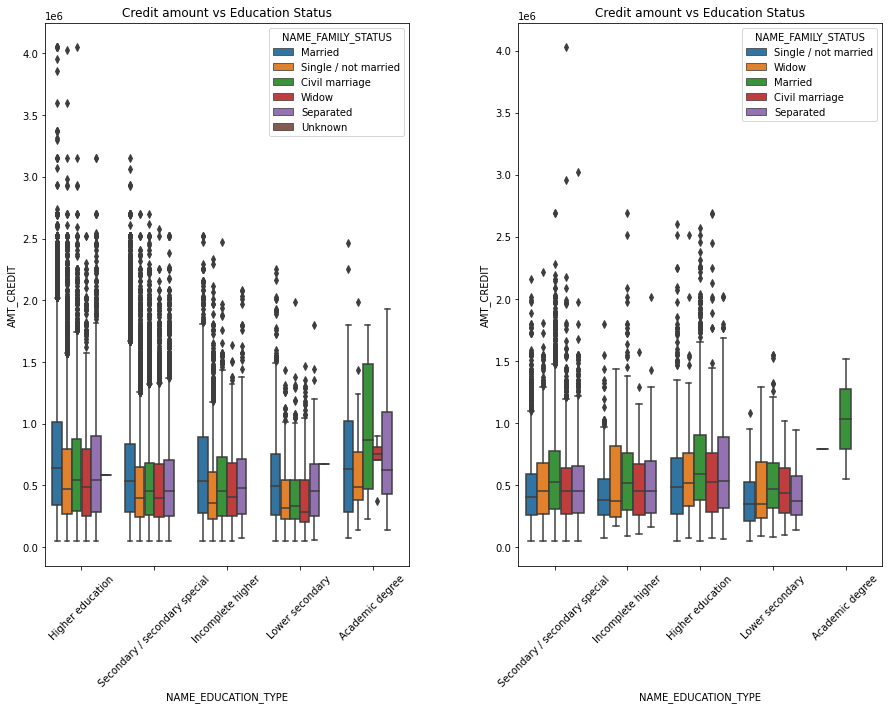

In [84]:
# Plotting boxes for the credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)
plt.subplot(121)
sns.boxplot(data =client_with_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.subplot(122)
sns.boxplot(data =client_with_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()



##### We can see from the plot above that some people with higher education have more credit scores than people with less advanced secondary education.People with Higher education level have more credits and are more propensity to pay their installment on time.There are more outliers in higher education.Secondary and secondary special education students are less likely to pay their bills on time.

### Income vs Education Status

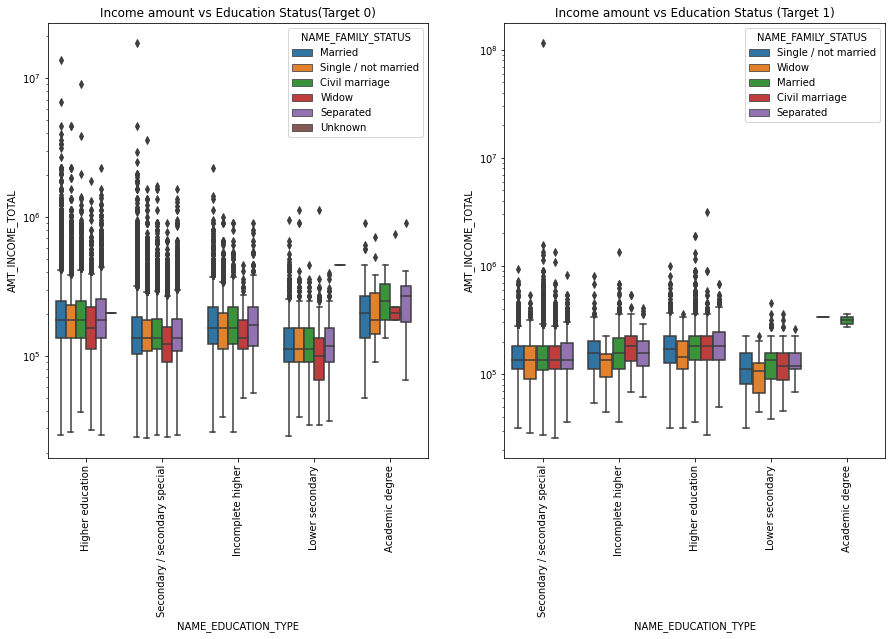

In [85]:
# Income amount box plotted using a logarithmic scale

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =client_with_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =client_with_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=90)
plt.show()




##### From the above plots,we can see that Higher education has many outliers.People with higher eductaion have higher income and dont have difficulties in making loan payment.People with higher education who have lesser income are unable to pay the loan.Hence we can conclude that,people with Higher income are most likely to make payments.

 ## Bivarient Analysis with Respect to Target Variable

In [86]:
# Take the main Dataframe into consideration for this analysis
df_new_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60


In [87]:
df_new_app.shape

(307511, 35)

In [88]:
df_new_app.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                0.313455
NAME_TYPE_SUITE                0.004201
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
SK_ID_CURR                     0.000000
DAYS_REGISTRATION              0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
AMT_CREDIT_RANGE               0.000000
AMT_INCOME_RANGE               0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
TARGET                         0.000000
REGION_POPULATION_RELATIVE     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000


In [89]:
# Create new Dataframe drop 31 % of null rows from the original DataFrame
df = df_new_app[~(df_new_app.OCCUPATION_TYPE.isnull())]

In [90]:
df.shape

(211120, 35)

In [91]:
df.TARGET.value_counts(normalize=True)

0    0.912149
1    0.087851
Name: TARGET, dtype: float64

In [92]:
# Convert Datatype of the TARGET to object
df.TARGET = df.TARGET.astype('str')

In [93]:
df.TARGET.dtype

dtype('O')

In [94]:
# AMT_CREDIT V/S TARGET
df.groupby('TARGET')['AMT_CREDIT'].mean()

TARGET
0    615436.440272
1    556986.322775
Name: AMT_CREDIT, dtype: float64

In [95]:
# AMT_GOODS_PRICE V/S TARGET
df.groupby('TARGET')['AMT_GOODS_PRICE'].mean()

TARGET
0    554028.861641
1    487458.397302
Name: AMT_GOODS_PRICE, dtype: float64

<Figure size 1080x576 with 0 Axes>

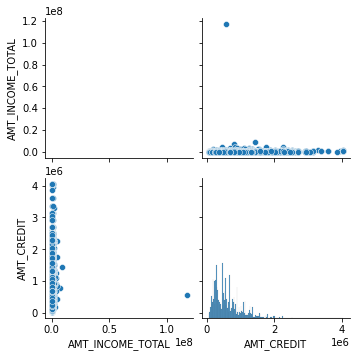

In [96]:
# Plot Pair Plot for TARGET V/S NAME_HOUSING_TYPE
plt.figure(figsize=[15,8])
sns.pairplot(data=df,vars=['AMT_INCOME_TOTAL','AMT_CREDIT'])
plt.show()

##### We can infer from the aforementioned bivariate analysis that AMT CREDIT to applicants who pay loan instalments on time is higher than AMT CREDIT to applicants who do not. Applicants with low Good Price default on loans.

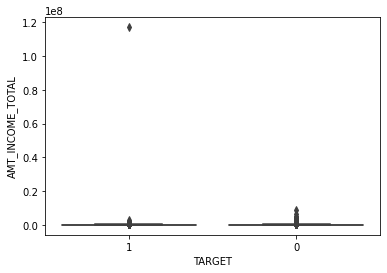

In [97]:
# Plot a box to check AMT_INCOME_TOTAL V/S TARGET
sns.boxplot(data=df,x='TARGET',y='AMT_INCOME_TOTAL')
plt.show()

In [98]:
# function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

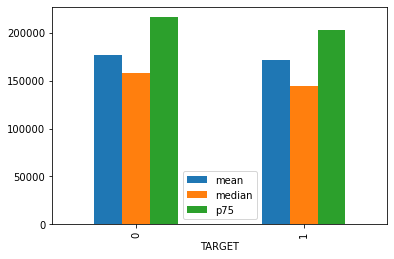

In [99]:
# plot the bar graph of AMT_INCOME_TOTAL mean,median,75 percentitle with TARGET.
df.groupby('TARGET')['AMT_INCOME_TOTAL'].aggregate(['mean','median',p75]).plot.bar()
plt.show()

In [100]:
# Create TARGET_FLAG Column whoes datatype should be int for catogorical catogorical Analysis
df['TARGET_FLAG'] = df.TARGET.astype('int')

In [101]:
# Revalidate the data
df.TARGET_FLAG.dtype

dtype('int32')

In [102]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,TARGET_FLAG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60,0


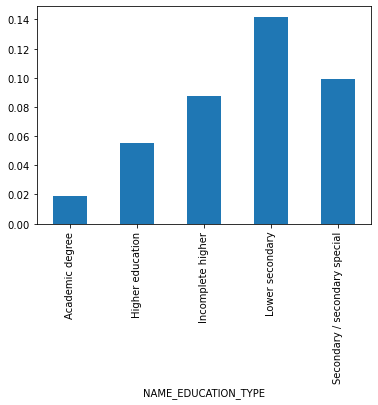

In [103]:
# Bar plot TARGET_FLAG V/S NAME_EDUCATION_TYPE
df.groupby('NAME_EDUCATION_TYPE')['TARGET_FLAG'].mean().plot.bar()
plt.show()

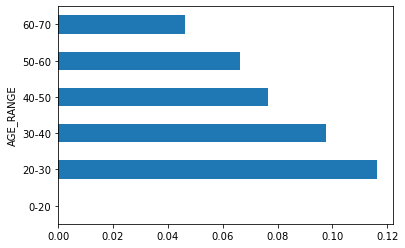

In [104]:
# AGE_RANGE V/S TARGET_FLAG
df.groupby('AGE_RANGE')['TARGET_FLAG'].mean().plot.barh()
plt.show()

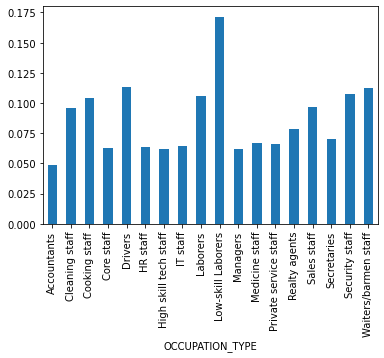

In [105]:
# ORGANIZATION_TYPE V/S TARGET_FLAG
df.groupby('OCCUPATION_TYPE')['TARGET_FLAG'].mean().plot.bar()
plt.show()

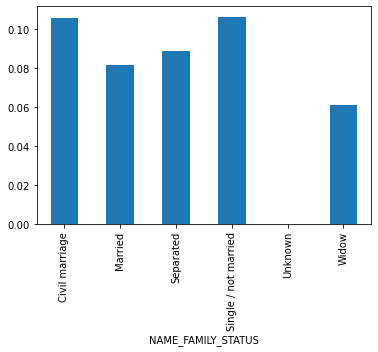

In [106]:
# TARGET_FLAG V/S NAME_FAMILY_STATUS
df.groupby('NAME_FAMILY_STATUS')['TARGET_FLAG'].mean().plot.bar()
plt.show()

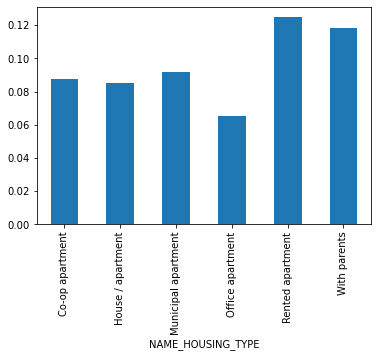

In [107]:
# TARGET V/S NAME_HOUSING_TYPE
df.groupby('NAME_HOUSING_TYPE')['TARGET_FLAG'].mean().plot.bar()
plt.show()

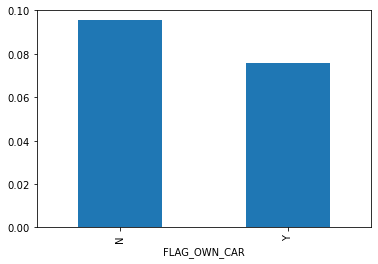

In [108]:
# FLAG_OWN_CAR V/S TARGET_FLAG
df.groupby('FLAG_OWN_CAR')['TARGET_FLAG'].mean().plot.bar()
plt.show()

#### The accompanying graphic shows that candidates with less formal secondary education are more likely to default on loans than candidates with formal education. applicants between the ages of 20 and 30 and those working in low-skilled labour occupations are more likely to default on loans. The likelihood of defaulting on a loan is higher for applicants with the family status of Single/Not Married & Civil Marriage and those who reside in rented apartments.

## 9. Reading the previous application

In [109]:
# Create data of privous loan Data
df_pre_app = pd.read_csv('previous_application.csv')

### Perform Basic Metadata check

In [110]:
df_pre_app.shape

(1670214, 37)

In [111]:
df_pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [112]:
df_pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Verify the amount of null values in the Private Loan dataframe.

In [113]:
round(df_pre_app.isnull().mean().sort_values(),3)*100

SK_ID_PREV                      0.0
NAME_YIELD_GROUP                0.0
NAME_SELLER_INDUSTRY            0.0
SELLERPLACE_AREA                0.0
CHANNEL_TYPE                    0.0
NAME_PRODUCT_TYPE               0.0
NAME_PORTFOLIO                  0.0
NAME_GOODS_CATEGORY             0.0
NAME_CLIENT_TYPE                0.0
CODE_REJECT_REASON              0.0
DAYS_DECISION                   0.0
NAME_CONTRACT_STATUS            0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_PAYMENT_TYPE               0.0
AMT_APPLICATION                 0.0
NFLAG_LAST_APPL_IN_DAY          0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
HOUR_APPR_PROCESS_START         0.0
WEEKDAY_APPR_PROCESS_START      0.0
NAME_CONTRACT_TYPE              0.0
SK_ID_CURR                      0.0
AMT_CREDIT                      0.0
PRODUCT_COMBINATION             0.0
CNT_PAYMENT                    22.3
AMT_ANNUITY                    22.3
AMT_GOODS_PRICE                23.1
DAYS_LAST_DUE                  40.3
DAYS_LAST_DUE_1ST_VERSION   

In [114]:
# Drop all the Columns which contains Null values more then 40 percentage
labels = ['DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE','DAYS_FIRST_DRAWING','NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','NAME_TYPE_SUITE','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED']
df_pre_app.drop(labels=labels,axis=1,inplace=True)


In [115]:
df_pre_app.shape

(1670214, 26)

In [116]:
df_pre_app.isnull().mean().sort_values(ascending=False)

AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
CODE_REJECT_REASON             0.000000e+00
NAME_YIELD_GROUP               0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
SELLERPLACE_AREA               0.000000e+00
CHANNEL_TYPE                   0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_GOODS_CATEGORY            0.000000e+00
NAME_CLIENT_TYPE               0.000000e+00
SK_ID_PREV                     0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
WEEKDAY_APPR_PROCESS_START     0

### Impute/Remove Missing Values

In [117]:
# Check Missing Value in AMT_CREDIT variable
df_pre_app[df_pre_app.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,NaN,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street


##### We can eliminate this row from the dataset because most of the numerical values are not provided in it.

In [118]:
df_pre_app = df_pre_app[~(df_pre_app.AMT_CREDIT.isnull())]

In [119]:
df_pre_app.shape

(1670213, 26)

In [120]:
# Check Missing Value in PRODUCT_COMBINATION variable 
len(df_pre_app[df_pre_app.PRODUCT_COMBINATION.isnull()])

346

##### As it won't affect our analysis and this column isn't all that relevant from an analysis standpoint, leave the values of this column as null.

In [121]:
# Check Missing Value in CNT_PAYMENT variable  
len(df_pre_app[df_pre_app.CNT_PAYMENT.isnull()])

372230

In [122]:
df_pre_app[df_pre_app.CNT_PAYMENT.isnull()].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,9,Y,1,XNA,Refused,-239,XNA,HC,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [123]:
df_pre_app.CNT_PAYMENT.dtype

dtype('float64')

In [124]:
df_pre_app.CNT_PAYMENT.describe()

count    1.297983e+06
mean     1.605409e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

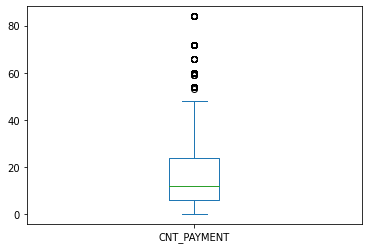

In [125]:
df_pre_app.CNT_PAYMENT.plot.box()
plt.show()

In [126]:
df_pre_app.CNT_PAYMENT.quantile([0,0.25,0.50,0.75,0.90,0.95,0.99,1])

0.00     0.0
0.25     6.0
0.50    12.0
0.75    24.0
0.90    36.0
0.95    48.0
0.99    60.0
1.00    84.0
Name: CNT_PAYMENT, dtype: float64

In [127]:
df_pre_app.CNT_PAYMENT.mean()

16.054093928811085

In [128]:
df_pre_app.CNT_PAYMENT.mode()

0    12.0
dtype: float64

##### Based on the boxplot, the mean value is 16.0540815603274, the most frequent value is 12.0, and the median is 12.000.   Although the median and mode are the same, it would be preferable to leave the data alone and avoid performing imputations because the missing percentage number is higher (22.29 percent).

In [129]:
# Check Missing Value in AMT_ANNUITY variable
df_pre_app.AMT_ANNUITY.dtype

dtype('float64')

In [130]:
df_pre_app.AMT_ANNUITY.describe()

count    1.297978e+06
mean     1.595513e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

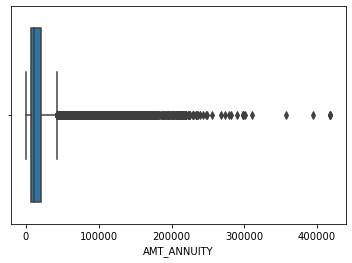

In [131]:
sns.boxplot(df_pre_app.AMT_ANNUITY)
plt.show()

In [132]:
df_pre_app.AMT_ANNUITY.quantile(q = [0.25,0.5,0.75,1])

0.25      6321.780
0.50     11250.000
0.75     20658.420
1.00    418058.145
Name: AMT_ANNUITY, dtype: float64

In [133]:
df_pre_app.AMT_ANNUITY.mode()

0    2250.0
dtype: float64

In [134]:
df_pre_app.AMT_ANNUITY.mean()

15955.13295173938

##### The median value for the quintile is 11250.00, the most frequent value is 2250.0, and the mean value is 15955.120659450406 It would be preferable to leave the data alone and refrain from imputations because the missing percentage figure is bigger (22.29 percent).

In [135]:
# Check Missing Value in AMT_GOODS_PRICE variable
df_pre_app.AMT_GOODS_PRICE.dtype

dtype('float64')

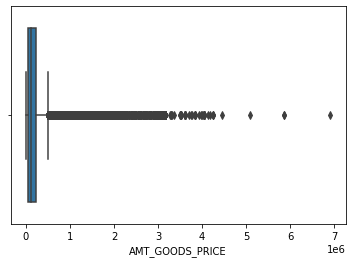

In [136]:
sns.boxplot(df_pre_app.AMT_GOODS_PRICE)
plt.show()

In [137]:
df_pre_app.AMT_GOODS_PRICE.quantile(q = [0.25,0.5,0.75,1])

0.25      50841.0
0.50     112320.0
0.75     234000.0
1.00    6905160.0
Name: AMT_GOODS_PRICE, dtype: float64

In [138]:
df_pre_app.AMT_GOODS_PRICE.mode()

0    45000.0
dtype: float64

In [139]:
df_pre_app.AMT_GOODS_PRICE.mean()

227847.27928334344

##### The variable's mean, median, and mode are 227847.27928334344, 112320.00, and 45000.0, respectively.

### Dealing with outliers in dataset

In [140]:
# Analysis of AMT_ANNUITY Column
df_pre_app.AMT_ANNUITY.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      6321.7800
0.50     11250.0000
0.75     20658.4200
0.99     69685.8174
1.00    418058.1450
Name: AMT_ANNUITY, dtype: float64

In [141]:
# Calculating IQR for AMT_ANNUITY Column
Q1 = df_pre_app['AMT_ANNUITY'].quantile(0.25)
Q3 = df_pre_app['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

14336.64


In [142]:
print('Min outlier',Q1 - 1.5 * IQR)
print('Max outlier',Q3 + 1.5 * IQR)

Min outlier -15183.18
Max outlier 42163.38


##### Value Greater then 42 k is an outlier

In [143]:
# Analysis of AMT_CREDIT Column
df_pre_app.AMT_CREDIT.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      24160.5
0.50      80541.0
0.75     216418.5
0.99    1515377.7
1.00    6905160.0
Name: AMT_CREDIT, dtype: float64

In [144]:
# Calculating IQR for AMT_CREDIT Column
Q1 = df_pre_app['AMT_CREDIT'].quantile(0.25)
Q3 = df_pre_app['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

192258.0


In [145]:
print('Min outlier',Q1 - 1.5 * IQR)
print('Max outlier',Q3 + 1.5 * IQR)

Min outlier -264226.5
Max outlier 504805.5


##### Value Greater then 504805 is an outlier

### Univarient Analysis

In [146]:
df_pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [147]:
# Analyze NAME_CONTRACT_STATUS variable
df_pre_app.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

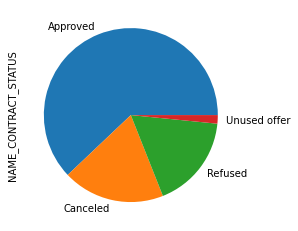

In [148]:
df_pre_app.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.show()

In [149]:
# Analyze NAME_PAYMENT_TYPE variable
df_pre_app.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [150]:
# Analyze NAME_CLIENT_TYPE variable
df_pre_app.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.737187
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

**Observation**
- about 62% of the loan are apporved by the bank
- Most of the applicant are repeaters who has applied for the lone

### Bivarient Analysis

In [151]:
df_pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


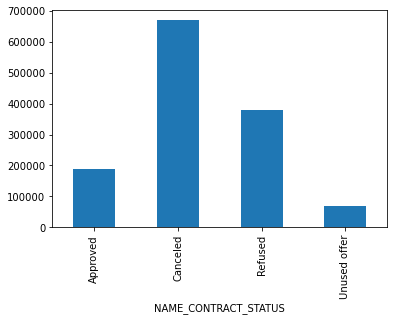

In [152]:
# AMT_GOODS_PRICE V/S NAME_CONTRACT_STATUS
df_pre_app.groupby('NAME_CONTRACT_STATUS')['AMT_GOODS_PRICE'].mean().plot.bar()
plt.show()

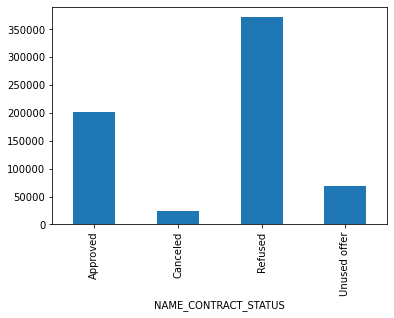

In [153]:
# AMT_CREDIT V/S NAME_CONTRACT_STATUS
df_pre_app.groupby('NAME_CONTRACT_STATUS')['AMT_CREDIT'].mean().plot.bar()
plt.show()

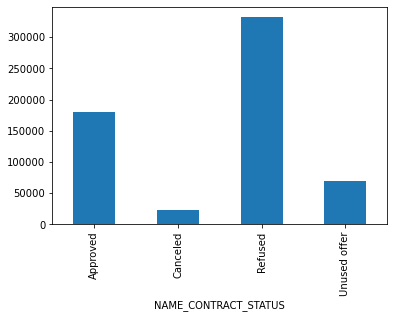

In [154]:
# AMT_APPLICATION V/S NAME_CONTRACT_STATUS
df_pre_app.groupby('NAME_CONTRACT_STATUS')['AMT_APPLICATION'].mean().plot.bar()
plt.show()

**Observation**
- Goods Price of amount under 200000 are more likely to be approved by the bank.

## Merge Dataset and create a new dataframe

In [155]:
df_merge = df.join(df_pre_app,on='SK_ID_CURR',how='left',lsuffix='_LEFT',rsuffix='_RIGHT')

In [156]:
df_merge.shape

(211120, 62)

In [157]:
df_new_app.shape

(307511, 35)

In [158]:
df_pre_app.shape

(1670213, 26)

In [159]:
df_merge.head()

,SK_ID_CURR_LEFT,TARGET,NAME_CONTRACT_TYPE_LEFT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_LEFT,AMT_ANNUITY_LEFT,AMT_GOODS_PRICE_LEFT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_LEFT,HOUR_APPR_PROCESS_START_LEFT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,TARGET_FLAG,SK_ID_PREV,SK_ID_CURR_RIGHT,NAME_CONTRACT_TYPE_RIGHT,AMT_ANNUITY_RIGHT,AMT_APPLICATION,AMT_CREDIT_RIGHT,AMT_GOODS_PRICE_RIGHT,WEEKDAY_APPR_PROCESS_START_RIGHT,HOUR_APPR_PROCESS_START_RIGHT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30,1,2464459,188249,Consumer loans,4401.810,32710.5,31851.0,32710.5,SATURDAY,10,Y,1,XAP,Approved,-2035,XNA,XAP,New,Mobile,POS,XNA,Country-wide,42,Connectivity,10.0,high,POS mobile with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50,0,2667447,298210,Consumer loans,4405.995,46755.0,37755.0,46755.0,SATURDAY,10,Y,1,XAP,Refused,-2771,XNA,SCO,Repeater,XNA,POS,XNA,Country-wide,42,Connectivity,12.0,low_normal,POS mobile with interest
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60,0,1739354,203078,Consumer loans,14542.200,86356.8,69084.0,86356.8,THURSDAY,21,Y,1,XAP,Approved,-1339,Cash through the bank,XAP,New,Audio/Video,POS,XNA,Country-wide,20,Connectivity,5.0,low_normal,POS mobile without interest
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60,0,1192502,272951,Consumer loans,8762.625,40360.5,42975.0,40360.5,SUNDAY,10,Y,1,XAP,Approved,-1354,Cash through the bank,XAP,Refreshed,Mobile,POS,XNA,Country-wide,30,Connectivity,6.0,high,POS mobile with interest
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60,0,1356512,160537,Consumer loans,8550.225,57465.0,62685.0,57465.0,WEDNESDAY,8,Y,1,XAP,Approved,-1708,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Regional / Local,28,Connectivity,10.0,high,POS mobile with interest


In [160]:
# Check Null percentage
df_merge.isnull().mean().sort_values(ascending=False)*100

AMT_GOODS_PRICE_RIGHT               23.103448
CNT_PAYMENT                         22.309113
AMT_ANNUITY_RIGHT                   22.309113
NAME_TYPE_SUITE                      0.429613
EXT_SOURCE_2                         0.195150
AMT_GOODS_PRICE_LEFT                 0.104680
PRODUCT_COMBINATION                  0.019894
AMT_ANNUITY_LEFT                     0.005684
AMT_INCOME_TOTAL                     0.000000
NAME_CONTRACT_STATUS                 0.000000
SK_ID_CURR_RIGHT                     0.000000
NAME_CONTRACT_TYPE_RIGHT             0.000000
FLAG_OWN_CAR                         0.000000
AMT_APPLICATION                      0.000000
AMT_CREDIT_RIGHT                     0.000000
CODE_GENDER                          0.000000
WEEKDAY_APPR_PROCESS_START_RIGHT     0.000000
HOUR_APPR_PROCESS_START_RIGHT        0.000000
FLAG_LAST_APPL_PER_CONTRACT          0.000000
NFLAG_LAST_APPL_IN_DAY               0.000000
NAME_CASH_LOAN_PURPOSE               0.000000
DAYS_DECISION                     

## Univarient Analysis

In [161]:
# Analysis on CHANNAL_TYPE
df_merge['CHANNEL_TYPE'].value_counts().sort_values(ascending = False)

Credit and cash offices       89985
Country-wide                  62590
Stone                         26946
Regional / Local              13909
Contact center                 9633
AP+ (Cash loan)                7286
Channel of corporate sales      714
Car dealer                       57
Name: CHANNEL_TYPE, dtype: int64

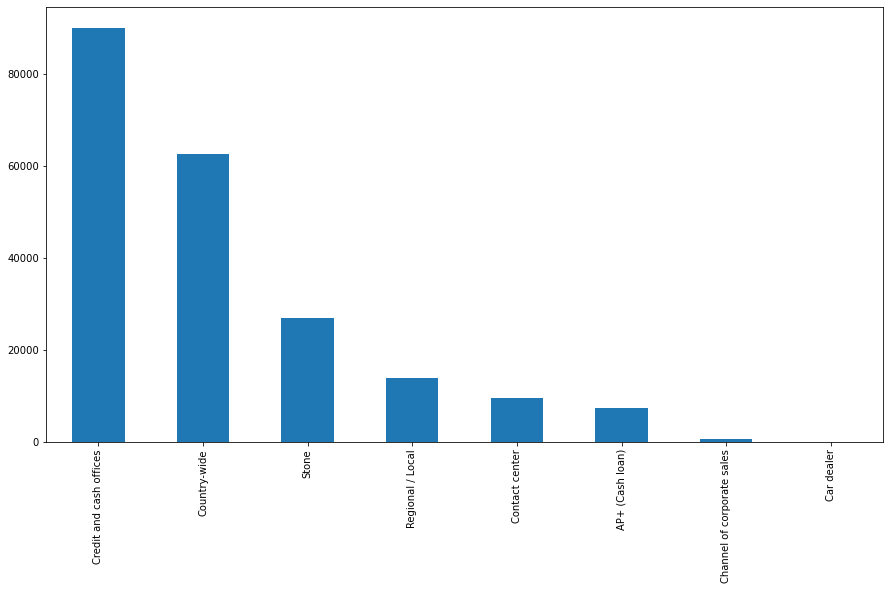

In [162]:
plt.figure(figsize=[15,8])
df_merge['CHANNEL_TYPE'].value_counts().sort_values(ascending = False).plot.bar()
plt.show()

**Credit and cash offices** is the highest Channel Type among all loan applications

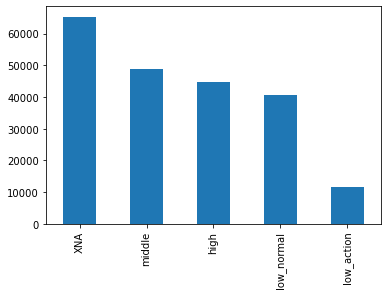

In [163]:
# Analysis on NAME_YIELD_GROUP
df_merge['NAME_YIELD_GROUP'].value_counts().sort_values(ascending = False).plot.bar()
plt.show()

**XNA** interest rate is the highest among all loan applications

### Correlation analysis of numerical variables

In [164]:
df_merge.head()

,SK_ID_CURR_LEFT,TARGET,NAME_CONTRACT_TYPE_LEFT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_LEFT,AMT_ANNUITY_LEFT,AMT_GOODS_PRICE_LEFT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_LEFT,HOUR_APPR_PROCESS_START_LEFT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,TARGET_FLAG,SK_ID_PREV,SK_ID_CURR_RIGHT,NAME_CONTRACT_TYPE_RIGHT,AMT_ANNUITY_RIGHT,AMT_APPLICATION,AMT_CREDIT_RIGHT,AMT_GOODS_PRICE_RIGHT,WEEKDAY_APPR_PROCESS_START_RIGHT,HOUR_APPR_PROCESS_START_RIGHT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,Medium,Medium,20-30,1,2464459,188249,Consumer loans,4401.810,32710.5,31851.0,32710.5,SATURDAY,10,Y,1,XAP,Approved,-2035,XNA,XAP,New,Mobile,POS,XNA,Country-wide,42,Connectivity,10.0,high,POS mobile with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,High,Medium,40-50,0,2667447,298210,Consumer loans,4405.995,46755.0,37755.0,46755.0,SATURDAY,10,Y,1,XAP,Refused,-2771,XNA,SCO,Repeater,XNA,POS,XNA,Country-wide,42,Connectivity,12.0,low_normal,POS mobile with interest
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,Low,Low,50-60,0,1739354,203078,Consumer loans,14542.200,86356.8,69084.0,86356.8,THURSDAY,21,Y,1,XAP,Approved,-1339,Cash through the bank,XAP,New,Audio/Video,POS,XNA,Country-wide,20,Connectivity,5.0,low_normal,POS mobile without interest
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,Low,Low,50-60,0,1192502,272951,Consumer loans,8762.625,40360.5,42975.0,40360.5,SUNDAY,10,Y,1,XAP,Approved,-1354,Cash through the bank,XAP,Refreshed,Mobile,POS,XNA,Country-wide,30,Connectivity,6.0,high,POS mobile with interest
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,Medium,Low,50-60,0,1356512,160537,Consumer loans,8550.225,57465.0,62685.0,57465.0,WEDNESDAY,8,Y,1,XAP,Approved,-1708,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Regional / Local,28,Connectivity,10.0,high,POS mobile with interest


In [165]:
corr_df = df_merge[['AMT_ANNUITY_LEFT', 'AMT_APPLICATION','AMT_CREDIT_LEFT', 'AMT_GOODS_PRICE_LEFT',
                    'AMT_ANNUITY_RIGHT', 'AMT_CREDIT_RIGHT', 'AMT_GOODS_PRICE_RIGHT', 'CNT_PAYMENT']].corr()

In [166]:
corr_df

,AMT_ANNUITY_LEFT,AMT_APPLICATION,AMT_CREDIT_LEFT,AMT_GOODS_PRICE_LEFT,AMT_ANNUITY_RIGHT,AMT_CREDIT_RIGHT,AMT_GOODS_PRICE_RIGHT,CNT_PAYMENT
AMT_ANNUITY_LEFT,1.000000,0.000230,0.760956,0.765314,-0.001674,-0.000292,-0.001472,-0.001233
AMT_APPLICATION,0.000230,1.000000,-0.001594,-0.001814,0.811841,0.976409,0.999879,0.683878
AMT_CREDIT_LEFT,0.760956,-0.001594,1.000000,0.986475,-0.003666,-0.002264,-0.002066,-0.001864
AMT_GOODS_PRICE_LEFT,0.765314,-0.001814,0.986475,1.000000,-0.004272,-0.002471,-0.002452,-0.002021
AMT_ANNUITY_RIGHT,-0.001674,0.811841,-0.003666,-0.004272,1.000000,0.818890,0.823773,0.400846
AMT_CREDIT_RIGHT,-0.000292,0.976409,-0.002264,-0.002471,0.818890,1.000000,0.993327,0.677479
AMT_GOODS_PRICE_RIGHT,-0.001472,0.999879,-0.002066,-0.002452,0.823773,0.993327,1.000000,0.675542
CNT_PAYMENT,-0.001233,0.683878,-0.001864,-0.002021,0.400846,0.677479,0.675542,1.000000


In [167]:
?sns.heatmap

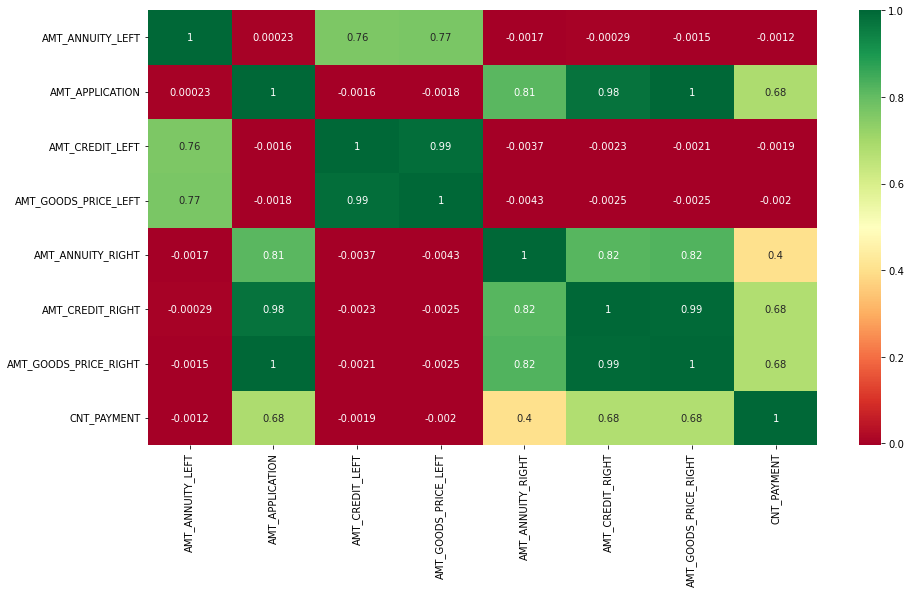

In [168]:
plt.figure(figsize=[15,8])
sns.heatmap(corr_df,annot=True,cmap='RdYlGn')
plt.show()

- **AMT_APPLICATION** has a high correlation with **AMT_ANNUITY_RIGHT**,**AMT_CREDIT_RIGHT**,**AMT_GOODS_PRICE_RIGHT** and decent correlation with **CNT_PAYMENT**
- **AMT_GOODS_PRICE_RIGHT** has a high correlation with **AMT_ANNUITY_RIGHT**,**AMT_CREDIT_RIGHT**,**AMT_APPLICATION** and decent correlation with **CNT_PAYMENT**
- **AMT_CREDIT_RIGHT** has a high correlation with **AMT_GOODS_PRICE_RIGHT** and decent correlation with **CNT_PAYMENT**
- **AMT_ANNUITY_LEFT** has a high correlation with **AMT_GOODS_PRICE_RIGHT**,**AMT_CREDIT_RIGHT**
- **AMT_ANNUITY_LEFT** has a high correlation with **AMT_GOODS_PRICE_LEFT**,**AMT_CREDIT_LEFT**
- **AMT_CREDIT_LEFT** has a high correlation with **AMT_GOODS_PRICE_LEFT**